In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
filepath = "./iot23_combined_oversample.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
del df['Unnamed: 0']

In [5]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,category,conn_state_SHR
0,2.998796,0.0,0.0,0.0,3.0,180.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malware,0.0
1,0.000000,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malware,0.0
2,0.000000,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Malware,0.0
3,2.998804,0.0,0.0,0.0,3.0,180.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0
4,0.000000,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725413,3.154209,0.0,0.0,0.0,3.0,180.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0
4725414,0.000000,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0
4725415,3.093752,0.0,0.0,0.0,3.0,180.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0
4725416,0.000000,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,0.0


In [6]:
df['category'].value_counts()

Malware    2362709
Benign     2362709
Name: category, dtype: int64

In [7]:
DT = DecisionTreeClassifier()

In [8]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_ssh', 'service_ssl', 'service_irc', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [9]:
start = time.time()
print('program start...')
print()

DT.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
['Malware' 'Benign' 'Benign' ... 'Benign' 'Malware' 'Benign']

Score:
0.8817311477075054
program end...

time cost: 
15.38533902168274 seconds


In [10]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

      Benign       0.93      0.82      0.87    472533
     Malware       0.84      0.94      0.89    472551

    accuracy                           0.88    945084
   macro avg       0.89      0.88      0.88    945084
weighted avg       0.89      0.88      0.88    945084



/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


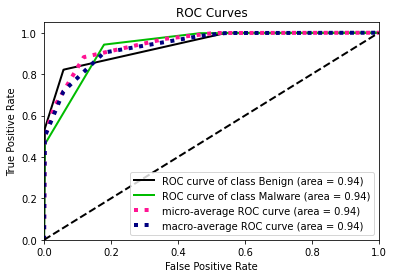

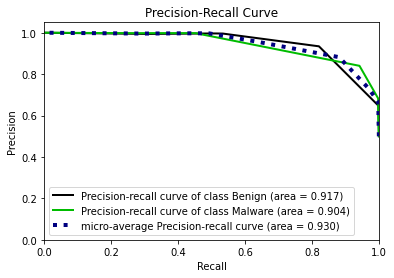

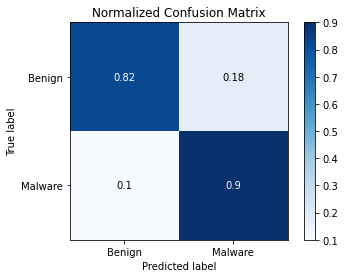

In [12]:
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
predicted_probas = DT.predict_proba(X_test)
#ROC曲线
skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.savefig('./DT/PIC/model_classification_roc.jpg')
#P-R曲线
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probas, cmap='nipy_spectral')
plt.savefig('./DT/PIC/model_classification_pr.jpg')
#混淆矩阵
predictions = cross_val_predict(DT, X, Y)
plot = skplt.metrics.plot_confusion_matrix(Y, predictions, normalize=True)
plt.savefig('./DT/PIC/model_classification_confusionMatrix.jpg')

In [13]:
import joblib
#lr是一个DT模型
joblib.dump(DT, './DT/dt.model')
# DT = joblib.load('dt.model')

['./DT/dt.model']